In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.calibration import CalibratedClassifierCV

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v10/v10_after_eda_V1.6.xlsx')

In [4]:
data_test = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v10/v10_after_eda_test_V1.6.xlsx')

In [5]:
data.columns

Index(['OpportunityID', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'Credit_Score__c', 'Time_in_Business__c', 'BBC_Position__c',
       'HB_with_LCF_Payment__c', 'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments_MA_AvgDailyBalance', 'Last3Statments_MA_ReturnItemDays',
       'Last3Statments_MA_OverdraftDays', 'Last3Statments_MA_NumReturnItems',
       'Last3Statments_Sum_NumReturnItems', 'FundedAmount', 'Paybackamount',
       'WriteOff_YN', 'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance',
       'Avg_ReturnItemdays', 'LatestMonth_ReturnItemDays',
       'PctChangeInReveune', 'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoMonthAvg_AdjustedMonthlyDeposits', 'AdjustedMonthlyDeposits',
       'drop

In [6]:
data_test.columns

Index(['OpportunityID', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'Credit_Score__c', 'Time_in_Business__c', 'BBC_Position__c',
       'HB_with_LCF_Payment__c', 'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments_MA_AvgDailyBalance', 'Last3Statments_MA_ReturnItemDays',
       'Last3Statments_MA_OverdraftDays', 'Last3Statments_MA_NumReturnItems',
       'Last3Statments_Sum_NumReturnItems', 'FundedAmount', 'Paybackamount',
       'WriteOff_YN', 'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance',
       'Avg_ReturnItemdays', 'LatestMonth_ReturnItemDays',
       'PctChangeInReveune', 'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoMonthAvg_AdjustedMonthlyDeposits', 'AdjustedMonthlyDeposits',
       'drop

In [7]:
data_test[['Industry_E-Commerce', 'Industry_Wholesale Trade', 'Drop_category_Neutral/Null']] = 0

In [8]:
data_test = data_test[['OpportunityID', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'Credit_Score__c', 'Time_in_Business__c', 'BBC_Position__c',
       'HB_with_LCF_Payment__c', 'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments_MA_AvgDailyBalance', 'Last3Statments_MA_ReturnItemDays',
       'Last3Statments_MA_OverdraftDays', 'Last3Statments_MA_NumReturnItems',
       'Last3Statments_Sum_NumReturnItems', 'FundedAmount', 'Paybackamount',
       'WriteOff_YN', 'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance',
       'Avg_ReturnItemdays', 'LatestMonth_ReturnItemDays',
       'PctChangeInReveune', 'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoMonthAvg_AdjustedMonthlyDeposits', 'AdjustedMonthlyDeposits',
       'drop_percent', 'Is_this_Business_home_based__c_Yes',
       'Industry_Construction', 'Industry_E-Commerce',
       'Industry_Finance, Insurance, Real Estate', 'Industry_Manufacturing',
       'Industry_Mining', 'Industry_Retail', 'Industry_Services',
       'Industry_Transportation & Public Utilities', 'Industry_Wholesale',
       'Industry_Wholesale Trade', 'Drop_category_Neutral/Null',
       'Drop_category_Positive']]

In [9]:
data.head(3)

,OpportunityID,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,Renewal_TwoWeekBounces,...,"Industry_Finance, Insurance, Real Estate",Industry_Manufacturing,Industry_Mining,Industry_Retail,Industry_Services,Industry_Transportation & Public Utilities,Industry_Wholesale,Industry_Wholesale Trade,Drop_category_Neutral/Null,Drop_category_Positive
0,0062M00000gZQK1QAO,90.00,0.60,1,0,2,43.19,11215.09,8271.55,0,...,1,0,0,0,0,0,0,0,0,1
1,0062M00000lvWxEQAU,96.88,0.78,1,9,1,13.65,28643.61,4936.54,0,...,0,0,0,0,1,0,0,0,0,1
2,0062M00000kxPSSQA2,100.00,0.70,2,0,1,23.79,119022.00,7773.77,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data_test.head()

,OpportunityID,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,Renewal_TwoWeekBounces,...,"Industry_Finance, Insurance, Real Estate",Industry_Manufacturing,Industry_Mining,Industry_Retail,Industry_Services,Industry_Transportation & Public Utilities,Industry_Wholesale,Industry_Wholesale Trade,Drop_category_Neutral/Null,Drop_category_Positive
0,0062M00000nqf6oQAA,100.00,0.90,1,1,1,24.24,18043.10,3583.33,0,...,0,0,0,0,1,0,0,0,0,0
1,0062M00000nqfF3QAI,100.00,0.78,1,1,4,16.33,15565.92,1418.70,0,...,0,0,0,0,1,0,0,0,0,1
2,0062M00000nqjtvQAA,100.00,0.49,3,0,2,28.68,31652.75,6569.85,0,...,0,0,0,0,0,0,0,0,0,0
3,0062M00000nqs8FQAQ,100.00,0.60,1,0,2,18.19,9331.39,1851.53,0,...,0,0,0,0,1,0,0,0,0,1
4,0062M00000nr94cQAA,98.33,0.56,1,3,1,21.81,16446.98,4122.46,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
data.shape

(3134, 45)

In [12]:
data_test.shape

(486, 45)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 45 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   OpportunityID                               3134 non-null   object 
 1   Renewal_PreviousPace                        3134 non-null   float64
 2   Renewal_PreviousPaidPercentageOfRTR         3134 non-null   float64
 3   Renewal_CountPreviousDeals                  3134 non-null   int64  
 4   Renewal_PreviousCountBounces                3134 non-null   int64  
 5   Renewal_PreviousPosition                    3134 non-null   int64  
 6   Renewal_PreviousHBwLCF                      3134 non-null   float64
 7   Renewal_PreviousAvgMonthRevenue             3134 non-null   float64
 8   Renewal_PreviousAvgDailyBalance             3134 non-null   float64
 9   Renewal_TwoWeekBounces                      3134 non-null   int64  
 10  Credit_Score

In [14]:
data.corr()['WriteOff_YN'].sort_values()

Time_in_Business__c                          -0.108244
Renewal_PreviousPaidPercentageOfRTR          -0.094702
Renewal_CountPreviousDeals                   -0.082606
Industry_Services                            -0.073244
Credit_Score__c                              -0.059382
Industry_Retail                              -0.032903
HB_with_LCF_Payment__c                       -0.020881
Industry_Mining                              -0.018274
PctAvgDailybalance2AvgMonthlyDeposits        -0.014980
Renewal_PreviousHBwLCF                       -0.014973
Industry_Manufacturing                       -0.006627
TwoMonthAvg_AdjustedMonthlyDeposits          -0.001790
Drop_category_Neutral/Null                   -0.001384
Last3Statments_Sum_NumReturnItems            -0.000225
Last3Statments_MA_NumReturnItems             -0.000169
Last3Statments_MA_AdjustedMonthlyDeposits     0.000823
Renewal_PreviousPosition                      0.001372
Last3Statments_MA_AvgDailyBalance             0.003192
Renewal_Pr

In [15]:
data.drop(['FundedWriteOffAmount_Gross','WOGross_AdvanceBalance'],axis = 1).corr()['WriteOff_YN'].sort_values()

Time_in_Business__c                          -0.108244
Renewal_PreviousPaidPercentageOfRTR          -0.094702
Renewal_CountPreviousDeals                   -0.082606
Industry_Services                            -0.073244
Credit_Score__c                              -0.059382
Industry_Retail                              -0.032903
HB_with_LCF_Payment__c                       -0.020881
Industry_Mining                              -0.018274
PctAvgDailybalance2AvgMonthlyDeposits        -0.014980
Renewal_PreviousHBwLCF                       -0.014973
Industry_Manufacturing                       -0.006627
TwoMonthAvg_AdjustedMonthlyDeposits          -0.001790
Drop_category_Neutral/Null                   -0.001384
Last3Statments_Sum_NumReturnItems            -0.000225
Last3Statments_MA_NumReturnItems             -0.000169
Last3Statments_MA_AdjustedMonthlyDeposits     0.000823
Renewal_PreviousPosition                      0.001372
Last3Statments_MA_AvgDailyBalance             0.003192
Renewal_Pr

In [16]:
data.shape

(3134, 45)

### Model Training

In [17]:
# X = data.drop(['WriteOff_YN','Industry','Industry_Group__c','OpportunityID',
#               'FundedWriteOffAmount_Net','PctChangeInReveune','PctAvgDailybalance2AvgMonthlyRevenue',
#               'LatestMonth_ReturnItemDays','Avg_ReturnItemdays'],axis = 1)
# y = data['WriteOff_YN']

In [18]:
X = data.drop(['WriteOff_YN','OpportunityID','FundedWriteOffAmount_Gross',
              'Paybackamount','FundedAmount', 'WOGross_AdvanceBalance'],axis = 1)
y = data['WriteOff_YN']

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 39 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Renewal_PreviousPace                        3134 non-null   float64
 1   Renewal_PreviousPaidPercentageOfRTR         3134 non-null   float64
 2   Renewal_CountPreviousDeals                  3134 non-null   int64  
 3   Renewal_PreviousCountBounces                3134 non-null   int64  
 4   Renewal_PreviousPosition                    3134 non-null   int64  
 5   Renewal_PreviousHBwLCF                      3134 non-null   float64
 6   Renewal_PreviousAvgMonthRevenue             3134 non-null   float64
 7   Renewal_PreviousAvgDailyBalance             3134 non-null   float64
 8   Renewal_TwoWeekBounces                      3134 non-null   int64  
 9   Credit_Score__c                             3134 non-null   float64
 10  Time_in_Busi

In [20]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.20,random_state=42)

In [21]:
X_test = data_test.drop(['WriteOff_YN','OpportunityID','FundedWriteOffAmount_Gross',
              'Paybackamount','FundedAmount', 'WOGross_AdvanceBalance'],axis = 1)
y_test = data_test['WriteOff_YN']

In [22]:
print('Shape of x_train is: {}'.format(X_train.shape))
print('Shape of x_val is: {}'.format(X_val.shape))
print('Shape of x_test is: {}'.format(X_test.shape))
print('----------------------------------------------')
print('Shape of y_train is: {}'.format(y_train.shape))
print('Shape of y_val is: {}'.format(y_val.shape))
print('Shape of y_test is: {}'.format(y_test.shape))

Shape of x_train is: (2507, 39)
Shape of x_val is: (627, 39)
Shape of x_test is: (486, 39)
----------------------------------------------
Shape of y_train is: (2507,)
Shape of y_val is: (627,)
Shape of y_test is: (486,)


In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [24]:
#checking the skewness of train set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_train).count(1)/len(y_train))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_train).count(0)/len(y_train)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


In [25]:
#checking the skewness of validation set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_val).count(1)/len(y_val))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_val).count(0)/len(y_val)*100)))

Percentage of  having WriteOFF_YN = 1: 25.0%
Percentage of  having WriteOFF_YN = 0: 75.0%


In [26]:
# #checking the skewness of validation set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_test).count(1)/len(y_test))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_test).count(0)/len(y_test)*100)))

Percentage of  having WriteOFF_YN = 1: 23.0%
Percentage of  having WriteOFF_YN = 0: 77.0%


In [27]:
#  Information value and weight of evidence
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF


In [28]:
iv, woe = iv_woe(data = data, target = 'WriteOff_YN', bins=20, show_woe = False)

Information value of OpportunityID is 1.599503
Information value of Renewal_PreviousPace is 0.003135
Information value of Renewal_PreviousPaidPercentageOfRTR is 0.089509
Information value of Renewal_CountPreviousDeals is 0.062194
Information value of Renewal_PreviousCountBounces is 0.026787
Information value of Renewal_PreviousPosition is 0.002303
Information value of Renewal_PreviousHBwLCF is 0.02062
Information value of Renewal_PreviousAvgMonthRevenue is 0.057557
Information value of Renewal_PreviousAvgDailyBalance is 0.044939
Information value of Renewal_TwoWeekBounces is 0.011913
Information value of Credit_Score__c is 0.066556
Information value of Time_in_Business__c is 0.191343
Information value of BBC_Position__c is 0.001993
Information value of HB_with_LCF_Payment__c is 0.024835
Information value of Last3Statments_MA_AdjustedMonthlyDeposits is 0.049792
Information value of Last3Statments_MA_AvgDailyBalance is 0.023364
Information value of Last3Statments_MA_ReturnItemDays is 0.0

In [29]:
# iv.to_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/logistic_v9/Info_value.xlsx',index = False)

#XGBoost Parameters Explanation


1.   eta - Learning rate - Prevents overfitting - Default = 0.3 - Range = [0,1]
2.   gamma - min_split_loss - Min loss reduction for a further partition - default = 0 - range = [0,infinity] (Higher gamma value means smaller loss reduction which means more splits. As a result, more conservative model,chances of improvement in accuracy.Higher values can also cause overfitting).
3.  lambda - L2 regularisation - default=1 - Higher value means more conservative model, likely to overfit
4. alpha - L1 regularization - default=0 - Higher values lead to more conservative model, likely to overfit 
5. scale_pos_weight - default=1 - Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances).









In [30]:
quantile_1 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.25)
quantile_1

816.25

In [31]:
quantile_2 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.5)
quantile_2

3526.08

In [32]:
quantile_3 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.75)
quantile_3

8282.25

In [33]:
# weight = []
# for i in data.index:
#   if data['WriteOff_YN'][i] == 0:
#     weight.append(1.0)
#   else:
#     if data['FundedWriteOffAmount_Gross'][i] < quantile_1:
#       weight.append(1.25)
#     elif data['FundedWriteOffAmount_Gross'][i] >= quantile_1 and data['FundedWriteOffAmount_Gross'][i] < quantile_2:
#       weight.append(1.5)
#     elif data['FundedWriteOffAmount_Gross'][i] >= quantile_2 and data['FundedWriteOffAmount_Gross'][i] < quantile_3:
#       weight.append(2.0)
#     else:
#       weight.append(2.25)

# weight = np.array(weight)
# len(weight)

In [34]:
weight = []
for i in y_train.index:
  if y_train[i] == 0:
    weight.append(1.0)
  else:
    if data['FundedWriteOffAmount_Gross'][i] < quantile_1:
      weight.append(1.25)
    elif data['FundedWriteOffAmount_Gross'][i] >= quantile_1 and data['FundedWriteOffAmount_Gross'][i] < quantile_2:
      weight.append(1.5)
    elif data['FundedWriteOffAmount_Gross'][i] >= quantile_2 and data['FundedWriteOffAmount_Gross'][i] < quantile_3:
      weight.append(2.0)
    else:
      weight.append(2.25)

weight = np.array(weight)
len(weight)

2507

In [35]:
# data[(data['FundedWriteOffAmount_Gross'] >= quantile_2) & (data['FundedWriteOffAmount_Gross'] < quantile_3)]

In [36]:
# median_WO = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].median()
# median_WO

In [37]:
# weight = []
# for i in data.index:
#   if data['FundedWriteOffAmount_Gross'][i] > median_WO:
#     weight.append(2)
#   else:
#     weight.append(1)
# weight = np.array(weight)
# len(weight)

In [38]:
# L1 = 0
# L2 = 10
# lr = 0.3

In [279]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid =    {'penalty' : ['elasticnet'],
          'C' : np.logspace(-4, 4, 20),
          'solver' : ['saga'],
          'max_iter' : [100],
          'class_weight': [{1:0.75,0:0.25},{1:0.6,0:0.4},{1:0.5,0:0.5}],
          'l1_ratio' : [0,0.125, 0.25, 0.5, 0.75, 0.875,1]}

logreg=LogisticRegression()
clf=GridSearchCV(logreg,grid,cv=3,n_jobs=-1,scoring = 'roc_auc')
clf.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.623776739188721, 'class_weight': {1: 0.5, 0: 0.5}, 'l1_ratio': 0.875, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
accuracy : 0.6436410452156731


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [280]:
from sklearn.metrics import SCORERS
print(SCORERS.keys())

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [281]:
# best parameters after training
clf.best_estimator_

LogisticRegression(C=1.623776739188721, class_weight={0: 0.5, 1: 0.5},
                   l1_ratio=0.875, penalty='elasticnet', solver='saga')

In [282]:
clf.best_params_

{'C': 1.623776739188721,
 'class_weight': {1: 0.5, 0: 0.5},
 'l1_ratio': 0.875,
 'max_iter': 100,
 'penalty': 'elasticnet',
 'solver': 'saga'}

In [283]:
predict_y_test = clf.predict(X_test)
predict_y_proba_test = clf.predict_proba(X_test)
predict_y_train = clf.predict(X_train)
predict_y_proba_train = clf.predict_proba(X_train)
predict_y_val = clf.predict(X_val)
predict_y_proba_val = clf.predict_proba(X_val)

In [284]:
# #here test score refers to the cv score
# x_axis = [i for i in range(100)]
# plt.plot(x_axis,clf.cv_results_['mean_test_score'][:100])
# plt.plot(x_axis,clf.cv_results_['mean_train_score'][:100])
# plt.legend(["test score", "train score"], loc ="lower right")
# plt.xlabel('iterations')
# plt.ylabel('roc_auc score')
# plt.title('plot for train and cv roc_auc scores')
# plt.show()

In [285]:
from sklearn.metrics import precision_score,recall_score

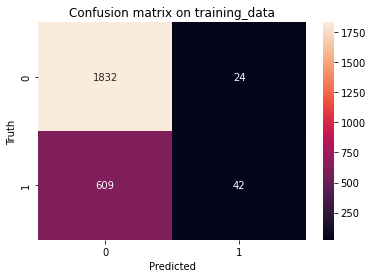

----------------------------
TP: 42
TN: 1832
FP: 24
FN: 609
F1-score: 0.11715481171548116
accuracy: 0.7475069804547267
Precision: 0.6363636363636364
Recall: 0.06451612903225806


In [286]:
# on training data
sns.heatmap(confusion_matrix(y_train,predict_y_train), annot=True, fmt='d')
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_train, predict_y_train).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))


print('F1-score: {}'.format(f1_score(predict_y_train,y_train)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_train,predict_y_train)))
print('Recall: {}'.format(recall_score(y_train,predict_y_train)))

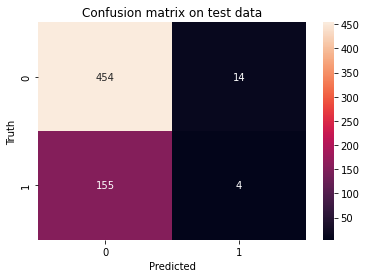

----------------------------
----------------------------
TP: 4
TN: 454
FP: 14
FN: 155
----------------------------
F1-score: 0.04519774011299435
accuracy: 0.7304625199362041
Precision: 0.2222222222222222
Recall: 0.025157232704402517


In [287]:
# on validation set
sns.heatmap(confusion_matrix(y_val,predict_y_val), annot=True, fmt='d')
plt.title('Confusion matrix on test data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_val,predict_y_val).ravel()
print("----------------------------")

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print("----------------------------")

print('F1-score: {}'.format(f1_score(y_val,predict_y_val)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_val,predict_y_val)))
print('Recall: {}'.format(recall_score(y_val,predict_y_val)))

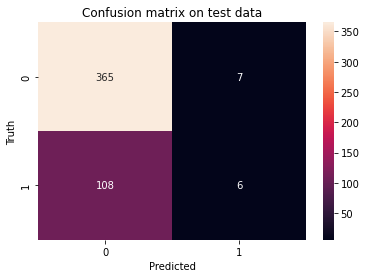

----------------------------
----------------------------
TP: 6
TN: 365
FP: 7
FN: 108
----------------------------
F1-score: 0.09448818897637794
accuracy: 0.7633744855967078
Precision: 0.46153846153846156
Recall: 0.05263157894736842


In [288]:
# on test set 
sns.heatmap(confusion_matrix(y_test,predict_y_test), annot=True, fmt='d')
plt.title('Confusion matrix on test data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_test,predict_y_test).ravel()
print("----------------------------")

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print("----------------------------")

print('F1-score: {}'.format(f1_score(y_test,predict_y_test)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_test,predict_y_test)))
print('Recall: {}'.format(recall_score(y_test,predict_y_test)))

In [289]:
print(len(clf.best_estimator_.coef_[0]))

39


In [290]:
clf.best_estimator_.coef_[0]

array([ 6.68282141e-02, -3.04932513e-01, -1.77714741e-01,  9.82090201e-02,
       -4.68321954e-08,  3.52561099e-02,  3.74814928e-02,  3.07568869e-02,
        5.59796418e-02, -8.51196205e-02, -2.57960314e-01,  9.33673447e-02,
       -8.65707235e-02, -1.37871834e-03,  2.21452015e-02,  5.33227105e-02,
        1.70649012e-01, -6.64445831e-02, -6.55222232e-02, -5.07256104e-02,
        1.05241057e-01,  8.86196945e-02, -3.47693538e-02, -7.61659656e-03,
       -7.09414453e-02,  1.72085723e-01, -5.36608161e-02,  1.17393497e-01,
        2.49389555e-02,  2.65325625e-02,  2.62740155e-02, -8.54135495e-02,
       -1.18126674e-01, -7.97720488e-02,  1.30077647e-01,  2.98912804e-02,
        2.14745677e-02,  5.77728235e-02,  1.66648306e-01])

Feature: 0, Score: 0.06682821
Feature: 1, Score: -0.30493251
Feature: 2, Score: -0.17771474
Feature: 3, Score: 0.09820902
Feature: 4, Score: -0.00000005
Feature: 5, Score: 0.03525611
Feature: 6, Score: 0.03748149
Feature: 7, Score: 0.03075689
Feature: 8, Score: 0.05597964
Feature: 9, Score: -0.08511962
Feature: 10, Score: -0.25796031
Feature: 11, Score: 0.09336734
Feature: 12, Score: -0.08657072
Feature: 13, Score: -0.00137872
Feature: 14, Score: 0.02214520
Feature: 15, Score: 0.05332271
Feature: 16, Score: 0.17064901
Feature: 17, Score: -0.06644458
Feature: 18, Score: -0.06552222
Feature: 19, Score: -0.05072561
Feature: 20, Score: 0.10524106
Feature: 21, Score: 0.08861969
Feature: 22, Score: -0.03476935
Feature: 23, Score: -0.00761660
Feature: 24, Score: -0.07094145
Feature: 25, Score: 0.17208572
Feature: 26, Score: -0.05366082
Feature: 27, Score: 0.11739350
Feature: 28, Score: 0.02493896
Feature: 29, Score: 0.02653256
Feature: 30, Score: 0.02627402
Feature: 31, Score: -0.08541355
Fea

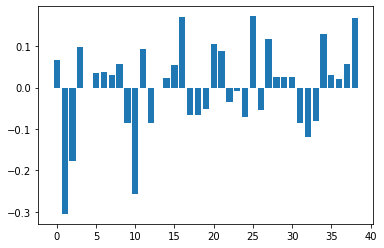

In [291]:
importance = clf.best_estimator_.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.8f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [292]:
# # check for feature importance
# features = X_train.columns
# features
# gain = clf.best_estimator_.feature_importances_
# plt.figure(figsize = (10, 18))
# plt.barh(features , gain)
# plt.xlabel("Score")
# plt.ylabel("features")
# plt.legend(["Feature Importance"])
# plt.show()

# For Train data

In [293]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_train)
check

,WriteOff_YN
755,0
3123,0
221,0
543,0
1395,0
...,...
3092,0
1095,0
1130,0
1294,0


In [294]:
check['Predicted Values'] = predict_y_train

In [295]:
check

,WriteOff_YN,Predicted Values
755,0,0
3123,0,0
221,0,0
543,0,0
1395,0,0
...,...,...
3092,0,0
1095,0,0
1130,0,0
1294,0,0


In [296]:
predict_y_proba_train

array([[0.83952061, 0.16047939],
       [0.61683381, 0.38316619],
       [0.85759629, 0.14240371],
       ...,
       [0.70444096, 0.29555904],
       [0.83950042, 0.16049958],
       [0.93275808, 0.06724192]])

In [297]:
write_off1 = []
for i in predict_y_proba_train:
  write_off1.append(i[1])


In [298]:
check['Predicted_Prob_WO = 1'] = write_off1

In [299]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
755,0,0,0.160479
3123,0,0,0.383166
221,0,0,0.142404
543,0,0,0.427613
1395,0,0,0.143084
...,...,...,...
3092,0,0,0.291302
1095,0,0,0.144415
1130,0,0,0.295559
1294,0,0,0.160500


In [300]:
check['OpportunityID'] = None

In [301]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [302]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
755,0,0,0.160479,0062M00000gZCzBQAW
3123,0,0,0.383166,0062M00000mzOPwQAM
221,0,0,0.142404,0062M00000hmTQ7QAM
543,0,0,0.427613,0062M00000gYK0WQAW
1395,0,0,0.143084,0062M00000nZQvIQAW
...,...,...,...,...
3092,0,0,0.291302,0062M00000iso7OQAQ
1095,0,0,0.144415,0062M00000kxY3XQAU
1130,0,0,0.295559,0062M00000jKY1WQAW
1294,0,0,0.160500,0062M00000kylvVQAQ


In [303]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.9400943787008607
Min_propability_value:  5.868200958892459e-06


Max_Probabilty - 0.89, Min_Probabilty - 0.15 - 0 percentile value
Explaination - In the range of 0 to 1, .89 - 100 percentile value

How deciles are made:
1) 10 deciles are formed based on the distribution of quantiles - we need to break percentile into 10 bins

In [304]:
check['Decile'] = None

In [305]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0
for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>check["Predicted_Prob_WO = 1"].quantile(0.90):
    d=10
    funded_amt_d10 = funded_amt_d10+data['FundedAmount'][i]
    gross_amt_d10 = gross_amt_d10 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d10 = advanced_amt_d10 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.80)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.90)):
    d=9
    funded_amt_d9 = funded_amt_d9+data['FundedAmount'][i]
    gross_amt_d9 = gross_amt_d9 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d9 = advanced_amt_d9 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.70)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.80)):
    d=8
    funded_amt_d8 = funded_amt_d8+data['FundedAmount'][i]
    gross_amt_d8 = gross_amt_d8 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d8 = advanced_amt_d8 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.60)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.70)):
    d=7
    funded_amt_d7 = funded_amt_d7+data['FundedAmount'][i]
    gross_amt_d7 = gross_amt_d7 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d7 = advanced_amt_d7+ data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.50)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.60)):
    d=6
    funded_amt_d6 = funded_amt_d6+data['FundedAmount'][i]
    gross_amt_d6 = gross_amt_d6+ data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d6 = advanced_amt_d6 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.40)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.50)):
    d=5
    funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.30)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.40)):
    d=4
    funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.20)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.30)):
    d=3
    funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.10)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.20)):
    d=2
    funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
  check['Decile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [306]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
755,0,0,0.160479,0062M00000gZCzBQAW,2
3123,0,0,0.383166,0062M00000mzOPwQAM,9
221,0,0,0.142404,0062M00000hmTQ7QAM,2
543,0,0,0.427613,0062M00000gYK0WQAW,10
1395,0,0,0.143084,0062M00000nZQvIQAW,2
...,...,...,...,...,...
3092,0,0,0.291302,0062M00000iso7OQAQ,7
1095,0,0,0.144415,0062M00000kxY3XQAU,2
1130,0,0,0.295559,0062M00000jKY1WQAW,7
1294,0,0,0.160500,0062M00000kylvVQAQ,2


In [307]:
check['Predicted_Prob_WO = 1'].nunique()

2507

In [308]:
check['Predicted_Prob_WO = 1'].max()

0.9400943787008607

In [309]:
check['Predicted_Prob_WO = 1'].quantile(0.9)

0.4047343848607178

In [310]:
len(check[check['Decile']==10])

251

In [311]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [312]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1152,0,0,0.000006,0062M00000iaoTZQAY,1
405,0,0,0.015056,0062M00000kytNNQAY,1
2354,0,0,0.023113,0062M00000isQuvQAE,1
2614,0,0,0.024036,0062M00000nGDHgQAO,1
1433,0,0,0.027382,0062M00000hlt4pQAA,1
...,...,...,...,...,...
3036,0,1,0.780592,0062M00000ga93OQAQ,10
530,1,1,0.800799,0062M00000iE1uVQAS,10
2069,1,1,0.833962,0062M00000mfV1kQAE,10
967,1,1,0.938749,0062M00000jzsJkQAI,10


In [313]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [314]:
exp_df = check.copy()

In [315]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1152,0,0,0.000006,0062M00000iaoTZQAY,1
405,0,0,0.015056,0062M00000kytNNQAY,1
2354,0,0,0.023113,0062M00000isQuvQAE,1
2614,0,0,0.024036,0062M00000nGDHgQAO,1
1433,0,0,0.027382,0062M00000hlt4pQAA,1
...,...,...,...,...,...
3036,0,1,0.780592,0062M00000ga93OQAQ,10
530,1,1,0.800799,0062M00000iE1uVQAS,10
2069,1,1,0.833962,0062M00000mfV1kQAE,10
967,1,1,0.938749,0062M00000jzsJkQAI,10


In [316]:
len(exp_df[exp_df['Decile']==1])

251

Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [317]:
N = len(exp_df)
N

2507

In [318]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

651

In [319]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    222
1     29
Name: WriteOff_YN, dtype: int64

In [320]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [321]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(29, 25, 41, 59, 57, 59, 77, 84, 91, 129)

In [322]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [323]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(29, 54, 95, 154, 211, 270, 347, 431, 522, 651)

In [324]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [325]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10) 

11.55378486055777 9.9601593625498 16.4 23.50597609561753 22.709163346613547 23.6 30.677290836653388 33.6 36.254980079681275 51.39442231075697


- What is a cummulative gain? - this is being done to check till how many deciles bins - how many % of merchants (i.e. WriteOff_YN = 0) respond in each decile 
- What is gain chart - A Gain Chart can be used to assess what % of merchants respond in each decile. So, rather than targeting customers from lower deciles, 
- customers can be picked up from the top deciles only.
- compute cumulative% of responders  or gain  = cg_i = 100*M_i/P

In [326]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [327]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

4.45468509984639 8.294930875576037 14.592933947772657 23.655913978494624 32.41167434715822 41.474654377880185 53.3026113671275 66.20583717357911 80.18433179723502 100.0


How to interpret Lift :

- If we target the top two deciles, then we would target 20% of the customers. In the same deciles, the cumulative % of responders is 28.3%. Hence, there is a lift of 1.41

- A lift of 1 means there is no gain compared with the no. of customers targeted at random. Lift greater than 1 means the model approach is better than selecting the customers at random.

- Lift - > (dependent on) - Gain - > (dependent on ) - > % responder (response rate)

- In general, the value of lift will go down as we are adding more deciles. Work will be increased. Lift = 1 means - we are considering every sample, so we are not performing every decile analyses 

- The value of lift in case of good model should be high.s

In [328]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.44546850998463905 0.4147465437788019 0.4864311315924219 0.5913978494623656 0.6482334869431644 0.6912442396313364 0.7614658766732499 0.827572964669739 0.890937019969278 1.0


In [329]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10]

In [330]:
max_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].max()]
max_range_dec = [round(100*i,2) for i in max_range]
max_range

[0.1304563405485712,
 0.164120333991883,
 0.19577374599204223,
 0.22285648561812504,
 0.24911493264718856,
 0.27743921700119256,
 0.3072151988127889,
 0.3449536805342645,
 0.4046892806084154,
 0.9400943787008607]

In [331]:
min_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].min()]
min_range_dec = [round(100*i,2) for i in min_range]
min_range

[5.868200958892459e-06,
 0.13088918367378485,
 0.164285221167606,
 0.1958243777250988,
 0.22310267933800768,
 0.24915369708953866,
 0.2776422046113272,
 0.30724618767215844,
 0.3451083937974545,
 0.40480204123917124]

In [332]:
avg_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].mean()]
avg_range_dec = [round(100*i,2) for i in avg_range]
avg_range_dec

[9.75, 14.76, 17.97, 21.01, 23.56, 26.22, 29.29, 32.51, 37.31, 48.31]

In [333]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [334]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [335]:
no_of_opps

[251, 251, 250, 251, 251, 250, 251, 250, 251, 251]

In [336]:
funded_amt

[7140120.0,
 5123325.0,
 4723350.0,
 5586225.0,
 4126957.79,
 5262862.0,
 4824757.0,
 4202104.0,
 4440900.0,
 6480779.85]

In [337]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.13754441, 0.09869368, 0.09098872, 0.1076108 , 0.07950006,
       0.10138166, 0.09294218, 0.08094764, 0.08554772, 0.12484314])

In [338]:
gross_amt

[341114.99999999994,
 290787.9,
 414771.64999999997,
 406291.78999999986,
 323808.87,
 685909.02,
 507960.1999999999,
 618060.5599999999,
 641670.56,
 1322201.080000001]

In [339]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.06143364112383262,
 0.1138035442115096,
 0.1885024952820867,
 0.261674252661327,
 0.31999111915002953,
 0.4435209802768628,
 0.5350028694696284,
 0.6463134557406368,
 0.7618761220050013,
 1.0]

In [340]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.047774407152820955,
 0.05675765250106133,
 0.087813024654112,
 0.07273101065567532,
 0.07846188075502464,
 0.1303300409549025,
 0.10528202767517615,
 0.14708359431370568,
 0.14449110765835754,
 0.20401882344452746]

In [341]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            'Funded_WO_Gross_$':gross_amt,
            '%_Funded_WO_Gross_$':gross_amt_pct,
            "Cum_WO_$" :cum_gross_pct,
            'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,251,29,11.553785,4.454685,7140120.00,0.137544,341115.00,0.047774,0.061434,913926.51,9.75,0.00,13.05
1,2,251,25,9.960159,8.294931,5123325.00,0.098694,290787.90,0.056758,0.113804,659386.48,14.76,13.09,16.41
2,3,250,41,16.400000,14.592934,4723350.00,0.090989,414771.65,0.087813,0.188502,817184.04,17.97,16.43,19.58
3,4,251,59,23.505976,23.655914,5586225.00,0.107611,406291.79,0.072731,0.261674,1053433.98,21.01,19.58,22.29
4,5,251,57,22.709163,32.411674,4126957.79,0.079500,323808.87,0.078462,0.319991,733075.28,23.56,22.31,24.91
5,6,250,59,23.600000,41.474654,5262862.00,0.101382,685909.02,0.130330,0.443521,1296475.22,26.22,24.92,27.74
6,7,251,77,30.677291,53.302611,4824757.00,0.092942,507960.20,0.105282,0.535003,1067918.46,29.29,27.76,30.72
7,8,250,84,33.600000,66.205837,4202104.00,0.080948,618060.56,0.147084,0.646313,1288340.33,32.51,30.72,34.50
8,9,251,91,36.254980,80.184332,4440900.00,0.085548,641670.56,0.144491,0.761876,1319332.71,37.31,34.51,40.47
9,10,251,129,51.394422,100.000000,6480779.85,0.124843,1322201.08,0.204019,1.000000,2835894.89,48.31,40.48,94.01


In [342]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,251,29,11.55,4.45,7140120.00,13.75,341115.00,4.78,6.14,913926.51,9.75,0.00,13.05
1,2,251,25,9.96,8.29,5123325.00,9.87,290787.90,5.68,11.38,659386.48,14.76,13.09,16.41
2,3,250,41,16.40,14.59,4723350.00,9.10,414771.65,8.78,18.85,817184.04,17.97,16.43,19.58
3,4,251,59,23.51,23.66,5586225.00,10.76,406291.79,7.27,26.17,1053433.98,21.01,19.58,22.29
4,5,251,57,22.71,32.41,4126957.79,7.95,323808.87,7.85,32.00,733075.28,23.56,22.31,24.91
5,6,250,59,23.60,41.47,5262862.00,10.14,685909.02,13.03,44.35,1296475.22,26.22,24.92,27.74
6,7,251,77,30.68,53.30,4824757.00,9.29,507960.20,10.53,53.50,1067918.46,29.29,27.76,30.72
7,8,250,84,33.60,66.21,4202104.00,8.09,618060.56,14.71,64.63,1288340.33,32.51,30.72,34.50
8,9,251,91,36.25,80.18,4440900.00,8.55,641670.56,14.45,76.19,1319332.71,37.31,34.51,40.47
9,10,251,129,51.39,100.00,6480779.85,12.48,1322201.08,20.40,100.00,2835894.89,48.31,40.48,94.01


Analyses from above DataFrame:
- %_Response_Rate - In decile_1 - 100% {231/231} of merchants are captured out of 
total_merchants (231 in that decile) who are likely stable merchants. Same goes with other deciles as well
- Cumulative_Gain - for 10% of merchant base (in each decile) - there are 23 (out of 58) responders (merchants) who are riskier 
- Similarly for 20 % of merchant base (2 deciles) - there are 28.38 % responses who are likely riskier merchants
- Lift - If we target the top 4 deciles, then we would target 40% of the merchants. In the same deciles, the cumulative % of responders is 56.1%. Hence, there is a lift of 1.40

<BarContainer object of 10 artists>

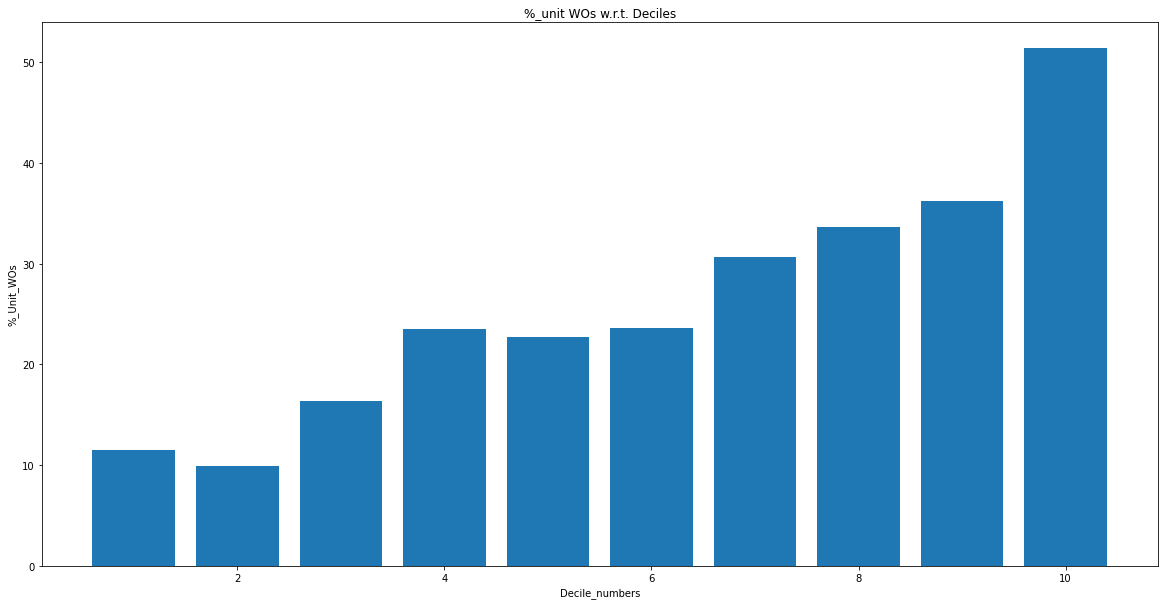

In [343]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])

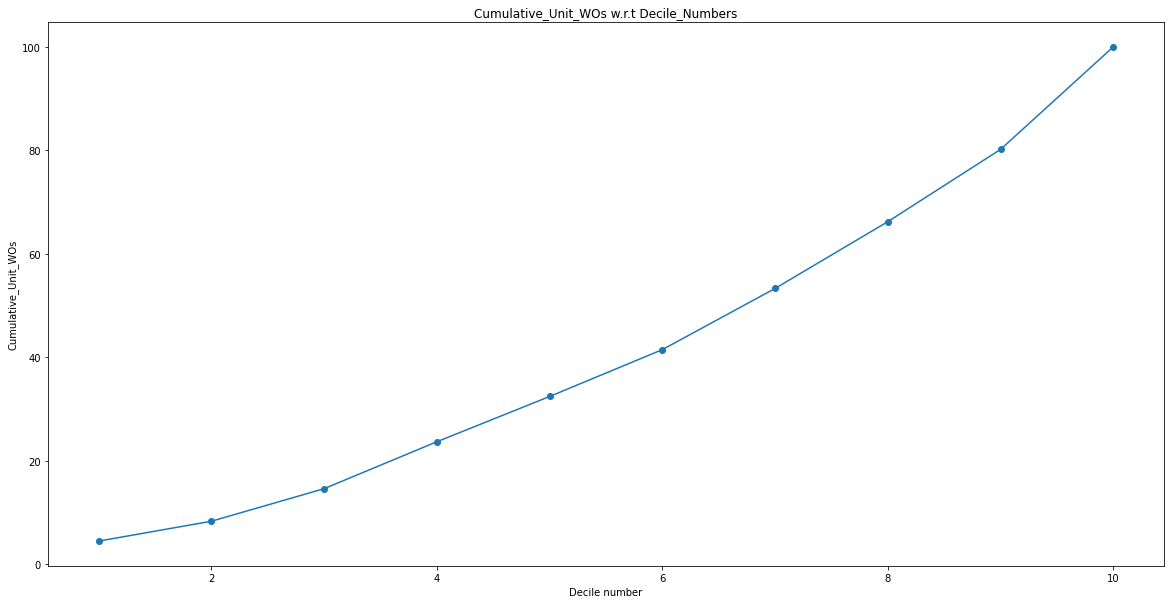

In [344]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

# For Validation data

In [345]:
#converting this into a dataframe as y_val is a series {we get retained indexes}
check = pd.DataFrame(y_val)
check

,WriteOff_YN
1786,1
528,0
449,0
1292,0
1097,1
...,...
2684,1
1237,0
2912,1
2721,0


In [346]:
check['Predicted Values'] = predict_y_val

In [347]:
check

,WriteOff_YN,Predicted Values
1786,1,1
528,0,0
449,0,0
1292,0,0
1097,1,0
...,...,...
2684,1,0
1237,0,0
2912,1,0
2721,0,0


In [348]:
predict_y_proba_val

array([[0.43153973, 0.56846027],
       [0.63347495, 0.36652505],
       [0.80820569, 0.19179431],
       ...,
       [0.81577779, 0.18422221],
       [0.87270087, 0.12729913],
       [0.50814912, 0.49185088]])

In [349]:
write_off1 = []
for i in predict_y_proba_val:
  write_off1.append(i[1])


In [350]:
check['Predicted_Prob_WO = 1'] = write_off1

In [351]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
1786,1,1,0.568460
528,0,0,0.366525
449,0,0,0.191794
1292,0,0,0.383437
1097,1,0,0.265048
...,...,...,...
2684,1,0,0.457790
1237,0,0,0.346852
2912,1,0,0.184222
2721,0,0,0.127299


In [352]:
check['OpportunityID'] = None

In [353]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [354]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
1786,1,1,0.568460,0062M00000mUgl6QAC
528,0,0,0.366525,0062M00000npOIWQA2
449,0,0,0.191794,0062M00000cD6TUQA0
1292,0,0,0.383437,0062M00000bngfeQAA
1097,1,0,0.265048,0062M00000lWdx9QAC
...,...,...,...,...
2684,1,0,0.457790,0062M00000lwNQYQA2
1237,0,0,0.346852,0062M00000n29LcQAI
2912,1,0,0.184222,0062M00000lWlgsQAC
2721,0,0,0.127299,0062M00000mzfNbQAI


In [355]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.9999310370370611
Min_propability_value:  0.015362355984002271


In [356]:
check['Decile'] = None

In [357]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>=min_range[9]:
    d=10
    funded_amt_d10 = funded_amt_d10+data['FundedAmount'][i]
    gross_amt_d10 = gross_amt_d10 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d10 = advanced_amt_d10 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[8]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[8]):
    d=9
    funded_amt_d9 = funded_amt_d9+data['FundedAmount'][i]
    gross_amt_d9 = gross_amt_d9 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d9 = advanced_amt_d9 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[7]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[7]):
    d=8
    funded_amt_d8 = funded_amt_d8+data['FundedAmount'][i]
    gross_amt_d8 = gross_amt_d8 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d8 = advanced_amt_d8 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[6]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[6]):
    d=7
    funded_amt_d7 = funded_amt_d7+data['FundedAmount'][i]
    gross_amt_d7 = gross_amt_d7 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d7 = advanced_amt_d7 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[5]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[5]):
    d=6
    funded_amt_d6 = funded_amt_d6+data['FundedAmount'][i]
    gross_amt_d6 = gross_amt_d6+ data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d6 = advanced_amt_d6 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[4]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[4]):
    d=5
    funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[3]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[3]):
    d=4
    funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[2]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[2]):
    d=3
    funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[1]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[1]):
    d=2
    funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
  check['Decile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [358]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1786,1,1,0.568460,0062M00000mUgl6QAC,10
528,0,0,0.366525,0062M00000npOIWQA2,9
449,0,0,0.191794,0062M00000cD6TUQA0,3
1292,0,0,0.383437,0062M00000bngfeQAA,9
1097,1,0,0.265048,0062M00000lWdx9QAC,6
...,...,...,...,...,...
2684,1,0,0.457790,0062M00000lwNQYQA2,10
1237,0,0,0.346852,0062M00000n29LcQAI,9
2912,1,0,0.184222,0062M00000lWlgsQAC,3
2721,0,0,0.127299,0062M00000mzfNbQAI,1


In [359]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [360]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
2739,0,0,0.015362,0062M00000gYJs1QAG,1
1511,0,0,0.017930,0062M00000jLvxLQAS,1
3071,0,0,0.025029,0062M00000l02kTQAQ,1
2282,0,0,0.034464,0062M00000n0i8oQAA,1
1397,0,0,0.042537,0062M00000mTGsbQAG,1
...,...,...,...,...,...
3024,0,1,0.571764,0062M00000bmsDZQAY,10
1225,0,1,0.582259,0062M00000mU5dqQAC,10
433,1,1,0.750331,0062M00000jzLa3QAE,10
785,0,1,0.891878,0062M00000l0YK2QAM,10


In [361]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [362]:
exp_df = check.copy()

In [363]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
2739,0,0,0.015362,0062M00000gYJs1QAG,1
1511,0,0,0.017930,0062M00000jLvxLQAS,1
3071,0,0,0.025029,0062M00000l02kTQAQ,1
2282,0,0,0.034464,0062M00000n0i8oQAA,1
1397,0,0,0.042537,0062M00000mTGsbQAG,1
...,...,...,...,...,...
3024,0,1,0.571764,0062M00000bmsDZQAY,10
1225,0,1,0.582259,0062M00000mU5dqQAC,10
433,1,1,0.750331,0062M00000jzLa3QAE,10
785,0,1,0.891878,0062M00000l0YK2QAM,10


In [364]:
exp_df['Decile'].value_counts()

3     77
9     71
4     69
1     67
10    66
6     65
5     64
2     54
8     49
7     45
Name: Decile, dtype: int64

Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [365]:
N = len(exp_df)
N

627

In [366]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

159

In [367]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    61
1     6
Name: WriteOff_YN, dtype: int64

In [368]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [369]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(6, 9, 23, 16, 14, 11, 15, 20, 20, 25)

In [370]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [371]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(6, 15, 38, 54, 68, 79, 94, 114, 134, 159)

In [372]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [373]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10) 

8.955223880597014 16.666666666666668 29.87012987012987 23.18840579710145 21.875 16.923076923076923 33.333333333333336 40.816326530612244 28.169014084507044 37.878787878787875


In [374]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [375]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

3.7735849056603774 9.433962264150944 23.89937106918239 33.9622641509434 42.76729559748428 49.685534591194966 59.11949685534591 71.69811320754717 84.27672955974843 100.0


In [376]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.37735849056603776 0.4716981132075472 0.7966457023060797 0.8490566037735849 0.8553459119496856 0.8280922431865828 0.8445642407906558 0.8962264150943395 0.936408106219427 1.0


In [377]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10]

In [378]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [379]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [380]:
no_of_opps

[67, 54, 77, 69, 64, 65, 45, 49, 71, 66]

In [381]:
sum(no_of_opps)

627

In [382]:
funded_amt

[1622800.0,
 1681100.0,
 1734500.0,
 2274500.0,
 1420400.0,
 1297200.0,
 2239100.0,
 938500.0,
 1803213.0,
 1321300.0]

In [383]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.09935948, 0.10292903, 0.10619856, 0.13926124, 0.0869671 ,
       0.07942391, 0.1370938 , 0.05746172, 0.11040567, 0.08089949])

In [384]:
gross_amt

[8738.5,
 168691.22,
 206747.41,
 295385.93000000005,
 29329.81,
 72410.16,
 308425.51,
 137444.23,
 232337.17999999996,
 312515.81]

In [385]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.004931361720159192,
 0.10012818323814886,
 0.21680109774476417,
 0.3834950232326194,
 0.40004659413077615,
 0.44090952154104135,
 0.614962019513757,
 0.6925253558390709,
 0.8236392398719982,
 1.0]

In [386]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.005384828691151097,
 0.10034573790970198,
 0.11919712309022773,
 0.1298685117608266,
 0.020648979160799774,
 0.05582035152636448,
 0.13774530391675227,
 0.1464509643047416,
 0.128846220607327,
 0.2365214637099826]

In [387]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            'Funded_WO_Gross_$':gross_amt,
            '%_Funded_WO_Gross_$':gross_amt_pct,
            "Cum_WO_$" :cum_gross_pct,
            'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,67,6,8.955224,3.773585,1622800.0,0.099359,8738.50,0.005385,0.004931,25899.81,9.75,0.00,13.05
1,2,54,9,16.666667,9.433962,1681100.0,0.102929,168691.22,0.100346,0.100128,493781.35,14.76,13.09,16.41
2,3,77,23,29.870130,23.899371,1734500.0,0.106199,206747.41,0.119197,0.216801,504039.96,17.97,16.43,19.58
3,4,69,16,23.188406,33.962264,2274500.0,0.139261,295385.93,0.129869,0.383495,520105.93,21.01,19.58,22.29
4,5,64,14,21.875000,42.767296,1420400.0,0.086967,29329.81,0.020649,0.400047,112090.12,23.56,22.31,24.91
5,6,65,11,16.923077,49.685535,1297200.0,0.079424,72410.16,0.055820,0.440910,220880.16,26.22,24.92,27.74
6,7,45,15,33.333333,59.119497,2239100.0,0.137094,308425.51,0.137745,0.614962,520659.91,29.29,27.76,30.72
7,8,49,20,40.816327,71.698113,938500.0,0.057462,137444.23,0.146451,0.692525,294024.69,32.51,30.72,34.50
8,9,71,20,28.169014,84.276730,1803213.0,0.110406,232337.18,0.128846,0.823639,521954.05,37.31,34.51,40.47
9,10,66,25,37.878788,100.000000,1321300.0,0.080899,312515.81,0.236521,1.000000,718285.49,48.31,40.48,94.01


In [388]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,67,6,8.96,3.77,1622800.0,9.94,8738.50,0.54,0.49,25899.81,9.75,0.00,13.05
1,2,54,9,16.67,9.43,1681100.0,10.29,168691.22,10.03,10.01,493781.35,14.76,13.09,16.41
2,3,77,23,29.87,23.90,1734500.0,10.62,206747.41,11.92,21.68,504039.96,17.97,16.43,19.58
3,4,69,16,23.19,33.96,2274500.0,13.93,295385.93,12.99,38.35,520105.93,21.01,19.58,22.29
4,5,64,14,21.88,42.77,1420400.0,8.70,29329.81,2.06,40.00,112090.12,23.56,22.31,24.91
5,6,65,11,16.92,49.69,1297200.0,7.94,72410.16,5.58,44.09,220880.16,26.22,24.92,27.74
6,7,45,15,33.33,59.12,2239100.0,13.71,308425.51,13.77,61.50,520659.91,29.29,27.76,30.72
7,8,49,20,40.82,71.70,938500.0,5.75,137444.23,14.65,69.25,294024.69,32.51,30.72,34.50
8,9,71,20,28.17,84.28,1803213.0,11.04,232337.18,12.88,82.36,521954.05,37.31,34.51,40.47
9,10,66,25,37.88,100.00,1321300.0,8.09,312515.81,23.65,100.00,718285.49,48.31,40.48,94.01


<BarContainer object of 10 artists>

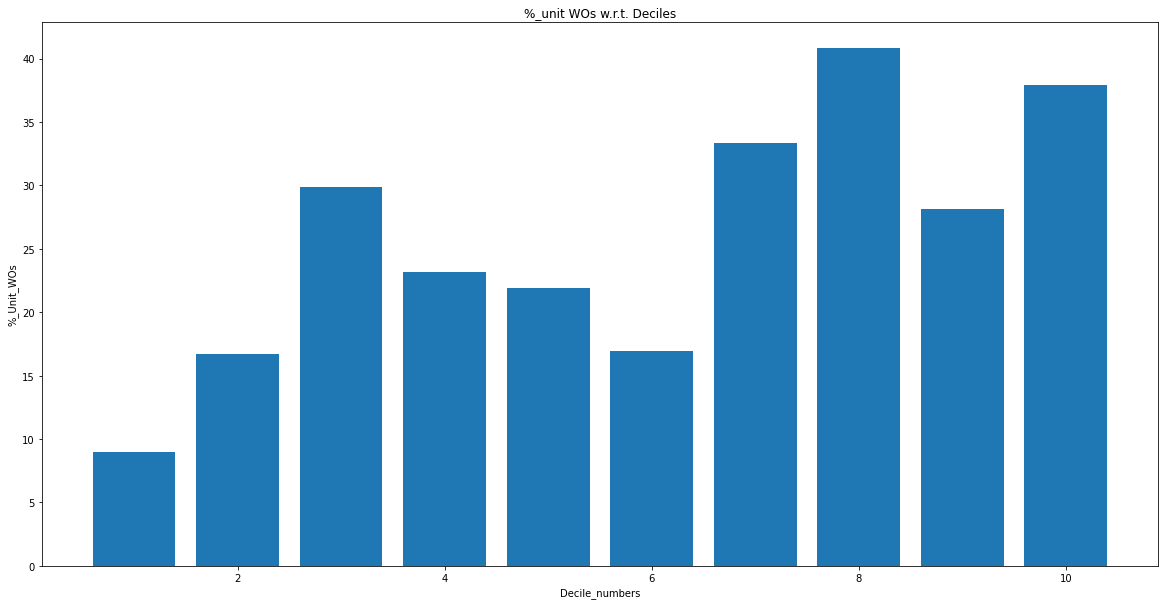

In [389]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])

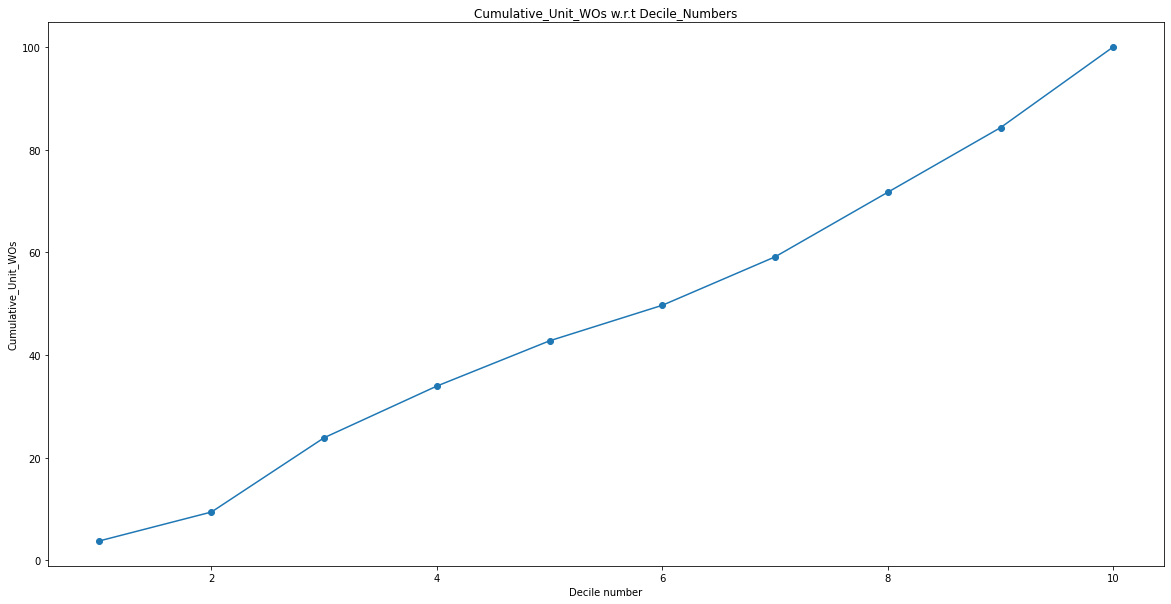

In [390]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

# For Test Set

In [391]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_test)
check

,WriteOff_YN
0,0
1,0
2,0
3,0
4,0
...,...
481,0
482,0
483,0
484,0


In [392]:
check['Predicted Values'] = predict_y_test

In [393]:
check

,WriteOff_YN,Predicted Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
481,0,0
482,0,0
483,0,0
484,0,0


In [394]:
print(predict_y_proba_test)

[[0.81827081 0.18172919]
 [0.68645732 0.31354268]
 [0.66537281 0.33462719]
 [0.75572901 0.24427099]
 [0.70740201 0.29259799]
 [0.70772602 0.29227398]
 [0.82003637 0.17996363]
 [0.6401364  0.3598636 ]
 [0.66431775 0.33568225]
 [0.77097419 0.22902581]
 [0.74038071 0.25961929]
 [0.81590988 0.18409012]
 [0.72537479 0.27462521]
 [0.8071842  0.1928158 ]
 [0.68561745 0.31438255]
 [0.90300952 0.09699048]
 [0.89227723 0.10772277]
 [0.4591862  0.5408138 ]
 [0.72625859 0.27374141]
 [0.89981981 0.10018019]
 [0.6339769  0.3660231 ]
 [0.87041036 0.12958964]
 [0.60370467 0.39629533]
 [0.81641044 0.18358956]
 [0.84726176 0.15273824]
 [0.65816389 0.34183611]
 [0.7135472  0.2864528 ]
 [0.62212628 0.37787372]
 [0.88753264 0.11246736]
 [0.73423514 0.26576486]
 [0.70492795 0.29507205]
 [0.84622782 0.15377218]
 [0.86103466 0.13896534]
 [0.67497419 0.32502581]
 [0.55531536 0.44468464]
 [0.59801778 0.40198222]
 [0.73409418 0.26590582]
 [0.86802195 0.13197805]
 [0.80448026 0.19551974]
 [0.82001973 0.17998027]


In [395]:
write_off1 = []
for i in predict_y_proba_test:
  write_off1.append(i[1])


In [396]:
check['Predicted_Prob_WO = 1'] = write_off1

In [397]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
0,0,0,0.181729
1,0,0,0.313543
2,0,0,0.334627
3,0,0,0.244271
4,0,0,0.292598
...,...,...,...
481,0,0,0.450628
482,0,0,0.194011
483,0,0,0.249357
484,0,0,0.351703


In [398]:
check['OpportunityID'] = None

In [399]:
for i in check.index:
  check['OpportunityID'][i] = data_test['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [400]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
0,0,0,0.181729,0062M00000nqf6oQAA
1,0,0,0.313543,0062M00000nqfF3QAI
2,0,0,0.334627,0062M00000nqjtvQAA
3,0,0,0.244271,0062M00000nqs8FQAQ
4,0,0,0.292598,0062M00000nr94cQAA
...,...,...,...,...
481,0,0,0.450628,0062M00000oYVfWQAW
482,0,0,0.194011,0062M00000oYVWyQAO
483,0,0,0.249357,0062M00000oYYg7QAG
484,0,0,0.351703,0062M00000oYZI3QAO


In [401]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.7202971534853176
Min_propability_value:  0.02452139791107714


In [402]:
check['Decile'] = None

In [403]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0

for i in check.index:
  
  if check["Predicted_Prob_WO = 1"][i]>=min_range[9]:
    d=10
    funded_amt_d10 = funded_amt_d10+data_test['FundedAmount'][i]
    gross_amt_d10 = gross_amt_d10 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d10 = advanced_amt_d10 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[8]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[8]):
    d=9
    funded_amt_d9 = funded_amt_d9+data_test['FundedAmount'][i]
    gross_amt_d9 = gross_amt_d9 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d9 = advanced_amt_d9 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[7]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[7]):
    d=8
    funded_amt_d8 = funded_amt_d8+data_test['FundedAmount'][i]
    gross_amt_d8 = gross_amt_d8 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d8 = advanced_amt_d8 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[6]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[6]):
    d=7
    funded_amt_d7 = funded_amt_d7+data_test['FundedAmount'][i]
    gross_amt_d7 = gross_amt_d7 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d7 = advanced_amt_d7 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[5]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[5]):
    d=6
    funded_amt_d6 = funded_amt_d6+data_test['FundedAmount'][i]
    gross_amt_d6 = gross_amt_d6+ data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d6 = advanced_amt_d6 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[4]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[4]):
    d=5
    funded_amt_d5 = funded_amt_d5+data_test['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[3]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[3]):
    d=4
    funded_amt_d4 = funded_amt_d4+data_test['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[2]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[2]):
    d=3
    funded_amt_d3 = funded_amt_d3+data_test['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[1]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[1]):
    d=2
    funded_amt_d2 = funded_amt_d2+data_test['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data_test['WOGross_AdvanceBalance'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data_test['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data_test['WOGross_AdvanceBalance'][i]
  check['Decile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [404]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
0,0,0,0.181729,0062M00000nqf6oQAA,3
1,0,0,0.313543,0062M00000nqfF3QAI,8
2,0,0,0.334627,0062M00000nqjtvQAA,8
3,0,0,0.244271,0062M00000nqs8FQAQ,5
4,0,0,0.292598,0062M00000nr94cQAA,7
...,...,...,...,...,...
481,0,0,0.450628,0062M00000oYVfWQAW,10
482,0,0,0.194011,0062M00000oYVWyQAO,3
483,0,0,0.249357,0062M00000oYYg7QAG,6
484,0,0,0.351703,0062M00000oYZI3QAO,9


In [405]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [406]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
248,0,0,0.024521,0062M00000oBrZQQA0,1
277,0,0,0.025504,0062M00000oOyngQAC,1
260,0,0,0.037324,0062M00000oBZmJQAW,1
81,0,0,0.038365,0062M00000o9cf1QAA,1
151,0,0,0.049821,0062M00000oAen7QAC,1
...,...,...,...,...,...
17,1,1,0.540814,0062M00000o8Do0QAE,10
64,1,1,0.542813,0062M00000o8zqjQAA,10
55,0,1,0.558587,0062M00000o8UpAQAU,10
216,0,1,0.711792,0062M00000oBb02QAC,10


In [407]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [408]:
exp_df = check.copy()

In [409]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
248,0,0,0.024521,0062M00000oBrZQQA0,1
277,0,0,0.025504,0062M00000oOyngQAC,1
260,0,0,0.037324,0062M00000oBZmJQAW,1
81,0,0,0.038365,0062M00000o9cf1QAA,1
151,0,0,0.049821,0062M00000oAen7QAC,1
...,...,...,...,...,...
17,1,1,0.540814,0062M00000o8Do0QAE,10
64,1,1,0.542813,0062M00000o8zqjQAA,10
55,0,1,0.558587,0062M00000o8UpAQAU,10
216,0,1,0.711792,0062M00000oBb02QAC,10


Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i) 


In [410]:
N = len(exp_df)
N

486

In [411]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

114

In [412]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39% 
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    55
1     8
Name: WriteOff_YN, dtype: int64

In [413]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [414]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(8, 8, 10, 1, 9, 8, 12, 25, 18, 15)

In [415]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [416]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(8, 16, 26, 27, 36, 44, 56, 81, 99, 114)

In [417]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [418]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10) 

12.698412698412698 15.09433962264151 19.23076923076923 2.4390243902439024 23.68421052631579 19.047619047619047 30.76923076923077 39.682539682539684 40.90909090909091 29.41176470588235


In [419]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [420]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

7.017543859649122 14.035087719298245 22.807017543859647 23.684210526315788 31.57894736842105 38.59649122807017 49.122807017543856 71.05263157894737 86.8421052631579 100.0


In [421]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i) 
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.7017543859649122 0.7017543859649122 0.7602339181286549 0.5921052631578947 0.631578947368421 0.6432748538011696 0.7017543859649122 0.8881578947368421 0.9649122807017545 1.0


In [422]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10]

In [423]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [424]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [425]:
no_of_opps

[63, 53, 52, 41, 38, 42, 39, 63, 44, 51]

In [426]:
sum(no_of_opps)

486

In [427]:
funded_amt

[1480500,
 1108000,
 2311500,
 658478,
 2151500,
 1364500,
 972086,
 1269000,
 1533037,
 1419800]

In [428]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.10376075, 0.07765411, 0.16200133, 0.04614939, 0.15078774,
       0.0956309 , 0.06812859, 0.08893779, 0.1074428 , 0.0995066 ])

In [429]:
gross_amt

[45481.62,
 41112.11,
 102000.66,
 9422.07,
 51845.55,
 60903.07000000001,
 287166.75999999995,
 103337.15999999999,
 227198.92,
 65446.42]

In [430]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.04576010041267741,
 0.0871239366563521,
 0.1897491387436869,
 0.19922889934357926,
 0.25139189560339775,
 0.31266787035188565,
 0.6015929300305698,
 0.7055628154031865,
 0.9341528566737451,
 1.0]

In [431]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.030720445795339415,
 0.03710479241877256,
 0.0441274756651525,
 0.014308860736425514,
 0.024097397164768768,
 0.0446339831440088,
 0.29541291614116444,
 0.08143196217494089,
 0.14820185031411506,
 0.046095520495844484]

In [432]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps, 
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            'Funded_WO_Gross_$':gross_amt,
            '%_Funded_WO_Gross_$':gross_amt_pct,
            "Cum_WO_$" :cum_gross_pct,
            'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,63,8,12.698413,7.017544,1480500,0.103761,45481.62,0.030720,0.045760,88956.91,9.75,0.00,13.05
1,2,53,8,15.094340,14.035088,1108000,0.077654,41112.11,0.037105,0.087124,73043.17,14.76,13.09,16.41
2,3,52,10,19.230769,22.807018,2311500,0.162001,102000.66,0.044127,0.189749,195660.66,17.97,16.43,19.58
3,4,41,1,2.439024,23.684211,658478,0.046149,9422.07,0.014309,0.199229,16772.07,21.01,19.58,22.29
4,5,38,9,23.684211,31.578947,2151500,0.150788,51845.55,0.024097,0.251392,168465.55,23.56,22.31,24.91
5,6,42,8,19.047619,38.596491,1364500,0.095631,60903.07,0.044634,0.312668,129455.15,26.22,24.92,27.74
6,7,39,12,30.769231,49.122807,972086,0.068129,287166.76,0.295413,0.601593,481673.61,29.29,27.76,30.72
7,8,63,25,39.682540,71.052632,1269000,0.088938,103337.16,0.081432,0.705563,226903.55,32.51,30.72,34.50
8,9,44,18,40.909091,86.842105,1533037,0.107443,227198.92,0.148202,0.934153,401766.27,37.31,34.51,40.47
9,10,51,15,29.411765,100.000000,1419800,0.099507,65446.42,0.046096,1.000000,136073.08,48.31,40.48,94.01


In [433]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,63,8,12.70,7.02,1480500,10.38,45481.62,3.07,4.58,88956.91,9.75,0.00,13.05
1,2,53,8,15.09,14.04,1108000,7.77,41112.11,3.71,8.71,73043.17,14.76,13.09,16.41
2,3,52,10,19.23,22.81,2311500,16.20,102000.66,4.41,18.97,195660.66,17.97,16.43,19.58
3,4,41,1,2.44,23.68,658478,4.61,9422.07,1.43,19.92,16772.07,21.01,19.58,22.29
4,5,38,9,23.68,31.58,2151500,15.08,51845.55,2.41,25.14,168465.55,23.56,22.31,24.91
5,6,42,8,19.05,38.60,1364500,9.56,60903.07,4.46,31.27,129455.15,26.22,24.92,27.74
6,7,39,12,30.77,49.12,972086,6.81,287166.76,29.54,60.16,481673.61,29.29,27.76,30.72
7,8,63,25,39.68,71.05,1269000,8.89,103337.16,8.14,70.56,226903.55,32.51,30.72,34.50
8,9,44,18,40.91,86.84,1533037,10.74,227198.92,14.82,93.42,401766.27,37.31,34.51,40.47
9,10,51,15,29.41,100.00,1419800,9.95,65446.42,4.61,100.00,136073.08,48.31,40.48,94.01


<BarContainer object of 10 artists>

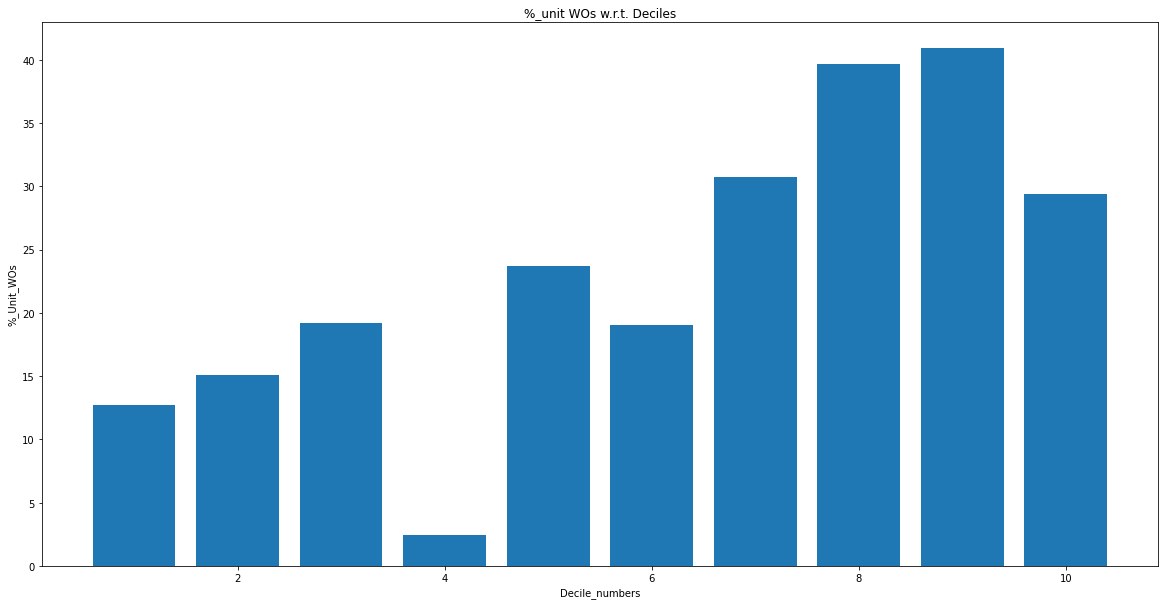

In [434]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])

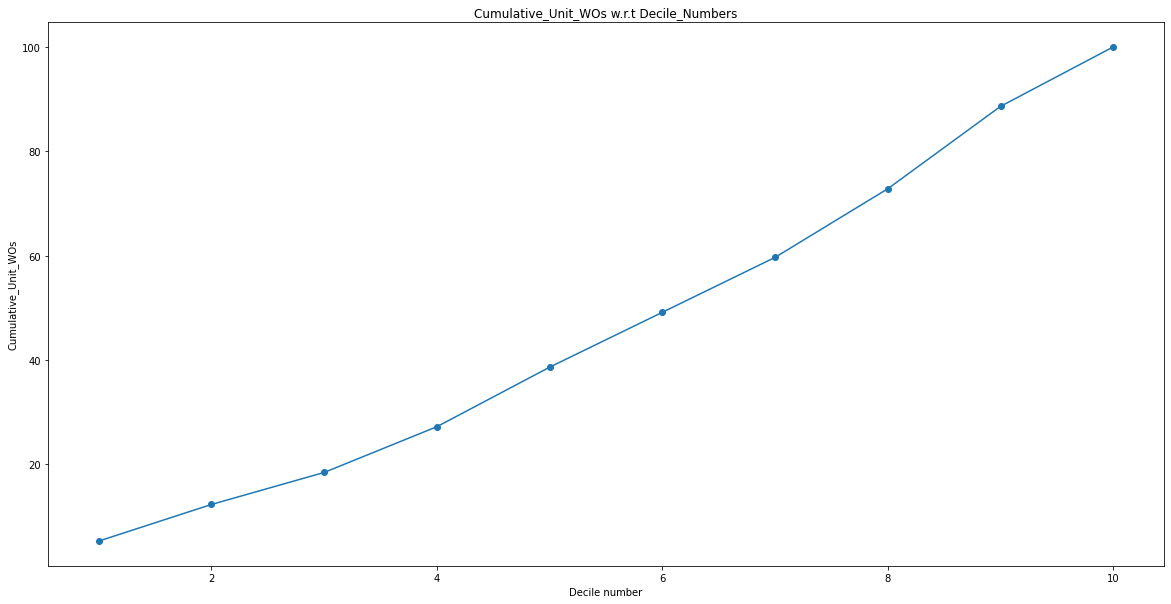

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}